## Text Processing

In [1]:
%load_ext watermark
%watermark -v -p numpy,mlxtend,pandas,polars,omegaconf --conda

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

numpy    : 1.26.4
mlxtend  : 0.23.1
pandas   : 2.2.1
polars   : 0.20.18
omegaconf: 2.3.0

conda environment: torch_p11



In [2]:
# Built-in library
from pathlib import Path
import re
import json
from typing import Any, Optional, Union
import logging
import warnings

# Standard imports
import numpy as np
import numpy.typing as npt
from pprint import pprint
import pandas as pd
import polars as pl
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "info": "#76FF7B",
        "warning": "#FBDDFE",
        "error": "#FF0000",
    }
)
console = Console(theme=custom_theme)

# Visualization
import matplotlib.pyplot as plt

# NumPy settings
np.set_printoptions(precision=4)

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Polars settings
pl.Config.set_fmt_str_lengths(1_000)
pl.Config.set_tbl_cols(n=1_000)

warnings.filterwarnings("ignore")


# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

In [3]:
import os
from tqdm import tqdm


def process_imdb_data(basepath: str, total_files: int = 50_000) -> pd.DataFrame:
    """
    Process IMDB movie review data and create a DataFrame.

    Parameters
    ----------
    basepath : str
        The base path to the IMDB dataset directory.
    total_files : int, optional
        The total number of files to process (default is 50,000).

    Returns
    -------
    pd.DataFrame
        A DataFrame containing processed movie reviews and their sentiments.
        Shape: (n_samples, 2)
        Columns: ['review', 'sentiment']
    """
    labels: dict[str, int] = {"pos": 1, "neg": 0}
    df: pd.DataFrame = pd.DataFrame(columns=["review", "sentiment"])

    with tqdm(total=total_files, desc="Processing files") as pbar:
        for s in ("test", "train"):
            for l in ("pos", "neg"):
                path: str = os.path.join(basepath, s, l)
                for file in sorted(os.listdir(path)):
                    with open(
                        os.path.join(path, file), "r", encoding="utf-8"
                    ) as infile:
                        txt: str = infile.read()
                    result: pd.DataFrame = pd.DataFrame(
                        [[txt, labels[l]]], columns=["review", "sentiment"]
                    )
                    df = pd.concat([df, result], ignore_index=True)
                    pbar.update(1)
    return df

In [4]:
basepath: str = "../../data/aclImdb/"
# data: pd.DataFrame = process_imdb_data(basepath=basepath)

In [5]:
basepath: str = "../../data/ImDB_data.parquet"
df: pl.DataFrame = pl.read_parquet(basepath)
df.head()

review,sentiment
str,i64
"""I felt this movie was as much about human sexuality as anything else, whether intentionally or not. We are also shown how absurd and paradoxical it is for women not to be allowed to such a nationally important event, meanwhile forgetting the pasts of our respective ""advanced"" nations. I write from Japan, where women merely got the right to vote 60 years ago, and female technical engineers are a recent phenomenon. Pubs in England were once all-male, the business world was totally off-limits for women in America until rather recently, and women in China had their feet bound so they couldn't develop feet strong enough to escape their husbands. Iran is conveniently going through this stage in our time, and we get a good look at how ridiculous we have all looked at one time or another. Back to the issue of sexuality, we are made to wonder what it may be intrinsically about women that make them unfit for a soccer game (the official reason is that the men are bad). Especially such boyish gir…",1
"""Let's face it, a truly awful movie, no...I mean a ""truly"" awful movie, is a rare, strange, and beautiful thing to behold. I admite that there is a special place in my heart for films like Plan 9 From Outer Space, Half Caste, Species, etc. And although I'm giving this film a 1, I highly urge anyone who enjoys a bad film for what it truly is (a bad film) to find a friend, snacks, something to drink, and make the special occasion it deserves out of: Aussie Park Boyz. <br /><br />From the very first moments of the lead actor's side to side eye-rolling performance as he attempts to inject intensity directly into the film without ever looking at a camera (a slice of ham straight out of silent pictures--eat your heart out Rudolph Valentino) to the sudden hey-we're-out-of-film conclusion, you...will...not...stop...laughing. <br /><br />To sum the film up, its a poor man's Warriors down under, complete--and that description alone should be enough, but then comes the wonders of ""the spaghetti e…",0
"""I saw this the week it opened four years ago and I really did not know what to expect being unfamiliar with Sorrentino's work at the time. He has created a very intriguing and ultimately moving account of an odd character, one for whom the phrase 'life is for living' no longer applies. It outwitted me at every turn and I was constantly surprised by the story. I enjoyed the pacing very much and the way I was gradually given the pieces to work out what was happening. Tony Servillo is superb, as is Magnani. It opens with a brilliantly stylish wide shot and concludes with a very moving image that takes the movie into sublime territory. I thought long afterwards about the main character and the position he was in and his final fate and I didn't shake it for weeks. I recently bought the film and that final scene where he thinks about his friend gets me every time. I still have yet to talk to anyone who has seen this. It's a shame that it did not reach a wider audience as if this is the dire…",1
"""Bad actors, terrible script, totally unbelievable ending - this film had it all. After seeing films like this, you wonder why the makers bothered at all. This film has absolutely nothing to say, all the methods used to create a scare have been used over and over again in previous horror films. A total waste of time.""",0
"""It was all over with the slashers around 88 so it was time for the cheesy rip offs of those older movies. The Brain is well done, the script reminded me of Videodrome but then in a more cheesy way as said before. The acting can go through with it. But it's the effects that makes you laugh, the so called Brain is really a turkey and the blood is never shown. The opening sequence is what makes this movie worth watching, the hallucinations are really nicely done and reminded me of Nightmare on Elm Street, remember the telephone coming alive.... Some how you keep watching this flick, waiting what is happening next. I

In [6]:
df.shape

(50000, 2)

In [7]:
console.print(df.select("review").to_series().to_list()[:2])

[
    'I felt this movie was as much about human sexuality as anything else, whether intentionally or not. We are 
also shown how absurd and paradoxical it is for women not to be allowed to such a nationally important event, 
meanwhile forgetting the pasts of our respective "advanced" nations. I write from Japan, where women merely got the
right to vote 60 years ago, and female technical engineers are a recent phenomenon. Pubs in England were once 
all-male, the business world was totally off-limits for women in America until rather recently, and women in China 
had their feet bound so they couldn\'t develop feet strong enough to escape their husbands. Iran is conveniently 
going through this stage in our time, and we get a good look at how ridiculous we have all looked at one time or 
another. Back to the issue of sexuality, we are made to wonder what it may be intrinsically about women that make 
them unfit for a soccer game (the official reason is that the men are bad). Especially such boyish girls, a couple 
so much so that you even get the feeling that lesbianism is on the agenda as well. I think one point is that not 
all women are the same, and the women the police are trying to "protect" are not the ones who would try to get in 
in the first place. The opening scenes of the approach to the stadium makes you appreciate the valor of the young 
women trying to get in -- and each one separately -- at all. It is a brutish man\'s world. Any woman brave enough 
to try to go should be allowed! The world of sexuality is not one-size-fits-all.<br /><br />Meanwhile, the 
apprehended criminal girls bond inside the makeshift pen awaiting their deportation to who-knows-where, and in a 
much more subtle way, begin to bond with the guards keeping watch over them. These had definite ideas about women 
and femininity, which were being challenged head-on. The change in attitude is glacial, but visible.<br /><br 
/>Since the movie is pure Iran from the first moment, it takes a little easing-into for the foreigner, but the 
characters have a special way of endearing themselves to you, and you end up getting the whole picture, and even 
understanding the men\'s misunderstandings and give them slack. The supposed villain is the unseen patriarchy of 
the Ayatollahs, which remain unseen and unnamed, and likely unremembered.<br /><br />Knowing that this movie was 
filmed during the actual event of the Iran-Bahrain match gives me a feeling of awe for all involved.',
    'Let\'s face it, a truly awful movie, no...I mean a "truly" awful movie, is a rare, strange, and beautiful 
thing to behold. I admite that there is a special place in my heart for films like Plan 9 From Outer Space, Half 
Caste, Species, etc. And although I\'m giving this film a 1, I highly urge anyone who enjoys a bad film for what it
truly is (a bad film) to find a friend, snacks, something to drink, and make the special occasion it deserves out 
of: Aussie Park Boyz. <br /><br />From the very first moments of the lead actor\'s side to side eye-rolling 
performance as he attempts to inject intensity directly into the film without ever looking at a camera (a slice of 
ham straight out of silent pictures--eat your heart out Rudolph Valentino) to the sudden hey-we\'re-out-of-film 
conclusion, you...will...not...stop...laughing. <br /><br />To sum the film up, its a poor man\'s Warriors down 
under, complete--and that description alone should be enough, but then comes the wonders of "the spaghetti eating 
scene", "the \'We\'ve got their tickets; they won\'t be leaving town now\' scene", "It\'s the Asians! Run!!" and 
more. The only truly objectionable part is a gratuitously filmed rape. Outside of this, I dare you to watch this 
film. And I dare you to find evidence of acting, or lines, or direction, or any of those other boring and 
superfluous elements that so-called critics say a film needs to be judged as good. <br /><br />If this movie 
doesn\'t cause fits of uncontrollable la

### Text Cleaning

In [8]:
def preprocessor(text: str) -> str:
    """
    Preprocess the input text by removing HTML tags, extracting emoticons,
    and converting to lowercase.

    Parameters
    ----------
    text : str
        The input text to be preprocessed.

    Returns
    -------
    str
        The preprocessed text with HTML tags removed, emoticons extracted,
        and converted to lowercase.
    """
    text = re.sub(r"<[^>]*>", "", text)
    emoticons: list[str] = re.findall(r"(?::|;|=)(?:-)?(?:\)|\(|D|P)", text)
    text = re.sub(r"[\W]+", " ", text.lower()) + " ".join(emoticons).replace(r"-", "")
    return text

In [9]:
# The prepocessor removes all non-word characters, html tags, converts the text
# to lower case and appends the emoticons to the end of the text. This is because a
# bag of words model doesn't conssider the order of words.
text: str = ":) Chukwu oma ki bu :) <some html tags> :-( :("
preprocessor(text)

' chukwu oma ki bu :) :) :( :('

### Comment

- A bag of words (BoW) model represents text data by focusing solely on the presence and frequency of words, completely disregarding the order in which those words appear.

In [10]:
html_pattern: str = r"<[^>]*>"
emoticons_pattern: str = r"(?::|;|=)(?:-)?(?:\)|\(|D|P)"
non_words_pattern: str = r"[\W]+"

sample_data: pl.DataFrame = pl.DataFrame(
    data={
        "review": [
            ":) Chukwu oma ki bu :) <some html tags> :-( :(",
            "I'm :) gonna add this <img src='image_url_can_be_found_here'>",
        ]
    }
)
sample_data

review
str
""":) Chukwu oma ki bu :) <some html tags> :-( :("""
"""I'm :) gonna add this <img src='image_url_can_be_found_here'>"""


In [11]:
# Polars Expressive Language (PEL) version
sample_data = (
    sample_data.with_columns(
        cleaned_review=pl.col("review")
        .str.replace_all(html_pattern, "")
        .str.replace_all(non_words_pattern, " "),
        emoticon=pl.col("review")
        .str.extract_all(emoticons_pattern)
        .map_elements(lambda x: " ".join(x)),
    )
    .with_columns(
        cleaned_review=pl.concat_str(
            pl.col("cleaned_review"), pl.col("emoticon"), separator=" "
        )
    )
    .drop(["emoticon"])
)

sample_data

review,cleaned_review
str,str
""":) Chukwu oma ki bu :) <some html tags> :-( :(""",""" Chukwu oma ki bu :) :) :-( :("""
"""I'm :) gonna add this <img src='image_url_can_be_found_here'>""","""I m gonna add this :)"""


<br><hr>

### Comment (Regarding the 2 versions of the code)

- **Version 1 (Recommended)**

```py
%%timeit
sample_data.with_columns(
    cleaned_review=pl.col("review")
    .str.replace_all(html_pattern, "")
    .str.replace_all(non_words_pattern, " ")
    .str.to_lowercase(),
    emoticon=pl.col("review")
    .str.extract_all(emoticons_pattern)
    .map_elements(lambda x: " ".join(x)),
).with_columns(
    cleaned_review=pl.concat_str(
        pl.col("cleaned_review"), pl.col("emoticon"), separator=" "
    )
).drop(
    ["emoticon"]
)

# 1.63 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
```

<hr>

- **Version 2 (Using `.map_elements(custom_func)`)**

  - Equivalent of `df["col].apply(custom_func)` in Pandas
  - This is slower.

```py
%%timeit
sample_data.with_columns(cleaned_text=pl.col("review").map_elements(preprocessor))

# 2.2 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
```
<hr><br>

In [12]:
df = (
    df.with_columns(
        cleaned_review=pl.col("review")
        .str.replace_all(html_pattern, "")
        .str.replace_all(non_words_pattern, " ")
        .str.to_lowercase(),
        emoticon=pl.col("review")
        .str.extract_all(emoticons_pattern)
        .map_elements(lambda x: " ".join(x)),
    )
    .with_columns(
        cleaned_review=pl.concat_str(
            pl.col("cleaned_review"), pl.col("emoticon"), separator=" "
        )
    )
    .drop(["emoticon"])
)

df.head()

review,sentiment,cleaned_review
str,i64,str
"""I felt this movie was as much about human sexuality as anything else, whether intentionally or not. We are also shown how absurd and paradoxical it is for women not to be allowed to such a nationally important event, meanwhile forgetting the pasts of our respective ""advanced"" nations. I write from Japan, where women merely got the right to vote 60 years ago, and female technical engineers are a recent phenomenon. Pubs in England were once all-male, the business world was totally off-limits for women in America until rather recently, and women in China had their feet bound so they couldn't develop feet strong enough to escape their husbands. Iran is conveniently going through this stage in our time, and we get a good look at how ridiculous we have all looked at one time or another. Back to the issue of sexuality, we are made to wonder what it may be intrinsically about women that make them unfit for a soccer game (the official reason is that the men are bad). Especially such boyish gir…",1,"""i felt this movie was as much about human sexuality as anything else whether intentionally or not we are also shown how absurd and paradoxical it is for women not to be allowed to such a nationally important event meanwhile forgetting the pasts of our respective advanced nations i write from japan where women merely got the right to vote 60 years ago and female technical engineers are a recent phenomenon pubs in england were once all male the business world was totally off limits for women in america until rather recently and women in china had their feet bound so they couldn t develop feet strong enough to escape their husbands iran is conveniently going through this stage in our time and we get a good look at how ridiculous we have all looked at one time or another back to the issue of sexuality we are made to wonder what it may be intrinsically about women that make them unfit for a soccer game the official reason is that the men are bad especially such boyish girls a couple so muc…"
"""Let's face it, a truly awful movie, no...I mean a ""truly"" awful movie, is a rare, strange, and beautiful thing to behold. I admite that there is a special place in my heart for films like Plan 9 From Outer Space, Half Caste, Species, etc. And although I'm giving this film a 1, I highly urge anyone who enjoys a bad film for what it truly is (a bad film) to find a friend, snacks, something to drink, and make the special occasion it deserves out of: Aussie Park Boyz. <br /><br />From the very first moments of the lead actor's side to side eye-rolling performance as he attempts to inject intensity directly into the film without ever looking at a camera (a slice of ham straight out of silent pictures--eat your heart out Rudolph Valentino) to the sudden hey-we're-out-of-film conclusion, you...will...not...stop...laughing. <br /><br />To sum the film up, its a poor man's Warriors down under, complete--and that description alone should be enough, but then comes the wonders of ""the spaghetti e…",0,"""let s face it a truly awful movie no i mean a truly awful movie is a rare strange and beautiful thing to behold i admite that there is a special place in my heart for films like plan 9 from outer space half caste species etc and although i m giving this film a 1 i highly urge anyone who enjoys a bad film for what it truly is a bad film to find a friend snacks something to drink and make the special occasion it deserves out of aussie park boyz from the very first moments of the lead actor s side to side eye rolling performance as he attempts to inject intensity directly into the film without ever looking at a camera a slice of ham straight out of silent pictures eat your heart out rudolph valentino to the sudden hey we re out of film conclusion you will not stop laughing to sum the film up its a poor man s warriors down under complete and that description alone should be enough but then comes the wonders of the spagh

### Stopwords

- `Stopwords` are common words in a language that typically don't contribute much meaningful information to the overall meaning or sentiment of a text.

```txt
Consider these two movie reviews:

- "The movie was absolutely fantastic and I loved every minute of it."
- "The movie was terrible and I hated every second of it."


Without removing stopwords, both sentences would have similar representations in a bag-of-words model, as they share many common words like "the", "was", "and", "I", "every", "of", "it".

After removing stopwords:

- "movie absolutely fantastic loved minute"
- "movie terrible hated second"


Now the representations are much more distinct, focusing on the meaningful words that actually convey sentiment.
```

### Benefits

- This helps the classifier (ML model) to:

  - Reduce noise in the data
  - Focus on words that carry more semantic meaning
  - Decrease the `dimensionality` of the feature space
  - Potentially improve classification accuracy
  - Reduce computational complexity

```txt
By removing stopwords, we emphasize the words that truly differentiate positive and negative sentiments, making it easier for traditional ML algorithms to learn and classify effectively.
```

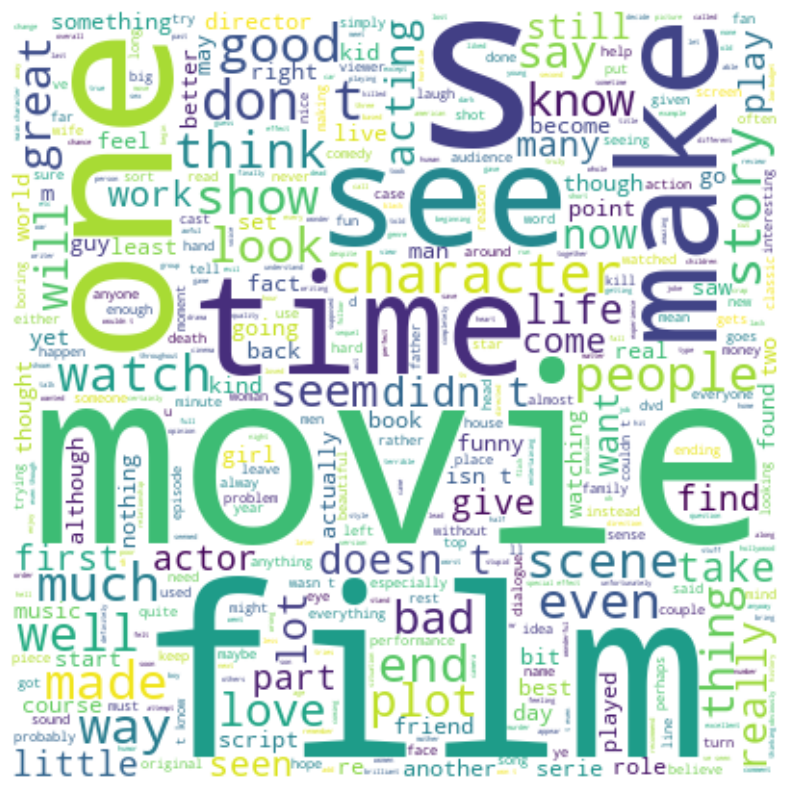

In [13]:
from wordcloud import WordCloud


wc: WordCloud = WordCloud(
    background_color="white",
    max_words=1_000,
    contour_width=3,
    contour_color="steelblue",
    width=400,
    height=400,
)

# Generate a word cloud
text: str = " ".join(df.select("cleaned_review").to_series().to_list())
word_cloud = wc.generate(text=text)

# Display the generated image
plt.figure(figsize=(8, 8))
plt.imshow(word_cloud, aspect="equal", interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

In [14]:
import spacy
from wordcloud import STOPWORDS


# Load the small English Model
nlp = spacy.load("en_core_web_sm")

In [15]:
from spacy.tokens import Doc, Token


# Register the 'lemma' extension
Token.set_extension("lemma", default=None, force=True)


def custom_lemmatizer(token: Token) -> str:
    """
    Custom lemmatizer function for removing the 'ing' suffix from
    gerunds/present participles.

    Parameters
    ----------
    token : Token
        A spaCy Token object.

    Returns
    -------
    str
        The lemmatized form of the token.
    """
    if token.tag_ == "VBG":  # Check if it's a gerund/present participle
        return token.lemma_.rstrip("ing")  # Remove 'ing' from the end of the lemma
    return token.lemma_  # Default to spaCy's lemmatizer for other cases


# Set the custom lemmatizer as a getter for the 'custom_lemma' extension
Token.set_extension("custom_lemma", getter=custom_lemmatizer, force=True)


def spacy_tokenize(text: str | list[str], lemmatize: bool = True) -> list[list[str]]:
    """
    Tokenize and optionally lemmatize text using spaCy.

    Parameters
    ----------
    text: str | list[str]
        Input text or list of texts to process.
    lemmatize : bool, optional
        Whether to lemmatize tokens, by default True.

    Returns
    -------
    list[list[str]]
        A list of lists, where each inner list contains tokens or lemmas for a sentence.

    Notes
    -----
    The shape of the output array is (n_sentences, n_tokens_per_sentence).
    """
    if isinstance(text, str):
        text = [text]
    my_doc: list[Doc] = list(nlp.pipe(text, disable=["parser", "ner"]))

    result: list[list[str]] = []
    for sent in my_doc:
        if lemmatize:  # use the custom lemmatizer
            result.append([token._.custom_lemma for token in sent])
        else:
            result.append([token.text for token in sent])

    return result

In [16]:
text: str = (
    "Mike is playing for Chelsea FC in a couple of hours. "
    "Some teams played yesterday. "
    "Neidu is an NLP engineer."
)

w_o_lemma: list[list[str]] = spacy_tokenize(text=text, lemmatize=False)
with_lemma: list[list[str]] = spacy_tokenize(text=text, lemmatize=True)
print(f"{w_o_lemma = }")
print(f"{with_lemma = }")

w_o_lemma = [['Mike', 'is', 'playing', 'for', 'Chelsea', 'FC', 'in', 'a', 'couple', 'of', 'hours', '.', 'Some', 'teams', 'played', 'yesterday', '.', 'Neidu', 'is', 'an', 'NLP', 'engineer', '.']]
with_lemma = [['Mike', 'be', 'play', 'for', 'Chelsea', 'FC', 'in', 'a', 'couple', 'of', 'hour', '.', 'some', 'team', 'play', 'yesterday', '.', 'neidu', 'be', 'an', 'NLP', 'engineer', '.']]


In [17]:
doc: Doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_

    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

Mike        PROPN     nsubj     
is          AUX       aux       
playing     VERB      ROOT      
for         ADP       prep      
Chelsea     PROPN     compound  
FC          PROPN     pobj      
in          ADP       prep      
a           DET       det       
couple      NOUN      pobj      
of          ADP       prep      
hours       NOUN      pobj      
.           PUNCT     punct     
Some        DET       det       
teams       NOUN      nsubj     
played      VERB      ROOT      
yesterday   NOUN      npadvmod  
.           PUNCT     punct     
Neidu       ADV       advmod    
is          AUX       ROOT      
an          DET       det       
NLP         PROPN     compound  
engineer    NOUN      attr      
.           PUNCT     punct     


In [18]:
spacy.explain("GPE") + " | " + spacy.explain("nsubj") + " | " + spacy.explain("ADP")

'Countries, cities, states | nominal subject | adposition'

In [19]:
def spacy_explain(terms: str | list[str]) -> None:
    if isinstance(terms, str):
        terms: list[str] = [terms]

    for term in terms:
        print(f"term: {term!r} -> {spacy.explain(term)}")

In [20]:
spacy_explain(["advmod", "attr"])

term: 'advmod' -> adverbial modifier
term: 'attr' -> attribute


In [21]:
doc.text

'Mike is playing for Chelsea FC in a couple of hours. Some teams played yesterday. Neidu is an NLP engineer.'

In [22]:
# Get the entities
for token in nlp(text).ents:
    print(f"text: {token.text} | ent: {token.label_}")

text: Mike | ent: PERSON
text: Chelsea FC | ent: PERSON
text: a couple of hours | ent: TIME
text: yesterday | ent: DATE
text: Neidu | ent: PERSON
text: NLP | ent: ORG


In [23]:
# token span and index
for token in doc:
    if token.i < 5:
        print(f"token: {token.text} | idx: {token.i}")

print("\n\nToken span:")
doc[-3:], doc[5:7]

token: Mike | idx: 0
token: is | idx: 1
token: playing | idx: 2
token: for | idx: 3
token: Chelsea | idx: 4


Token span:


(NLP engineer., FC in)

In [24]:
("a",) + ("b", "c")

('a', 'b', 'c')

In [25]:
from spacy.tokens import Span


doc: Doc = nlp("Dave bought a pair of wireless bluetooth earbuds")

span: Span = Span(doc, start=5, end=8, label="PRODUCT")
# Update the entity
# doc.ents = doc.ents + (span,)
doc.ents += (span,)

print(span)

wireless bluetooth earbuds


In [26]:
for token in doc.ents:
    print(f"token: {token.text} | entity: {token.label_}")

token: Dave | entity: PERSON
token: wireless bluetooth earbuds | entity: PRODUCT


#### SpaCy Matcher

- Similar to Regex

#### Phrase Matcher

- More efficient and faster.

In [27]:
# Import the Matcher
from spacy.matcher import Matcher


# Initialize the matcher with the shared vocab
matcher: Matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

# Process some text
doc: Doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(match_id, matched_span.text)

9528407286733565721 iPhone X


In [28]:
doc = nlp(
    "i downloaded Fortnite on my laptop and can't open the game at all. Help? "
    "so when I was downloading Minecraft, I got the Windows version where it "
    "is the '.zip' folder and I used the default program to unpack it... do "
    "I also need to download Winzip?"
)

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{"LEMMA": "download"}, {"POS": "PROPN"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("DOWNLOAD_THINGS_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print(f"Match found: {doc[start:end].text}")

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


In [29]:
doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print(f"Match found: {doc[start:end].text}")

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses


In [30]:
matcher = Matcher(nlp.vocab)
TEXTS: list[str] = [
    "Smartphone have transformed the way we live our lives."
    "The sleek iPhone X revolutionized smartphone design with its edge-to-edge display",
    "While the powerful iPhone 13 boasts improved camera capabilities, longer battery life, "
    "and 5G connectivity, making both devices popular choices for tech enthusiasts and casual users alike.",
    "Neidu got a smart watch and iPhone 11 Pro recently.",
]
# Add patterns to the matcher
pattern1: list[dict[str, Any]] = [{"LOWER": "iphone"}, {"LOWER": "x"}]
pattern2: list[dict[str, Any]] = [
    {"LOWER": "iphone"},
    {"IS_DIGIT": True},
    {"LOWER": "pro", "OP": "?"},
]
smart_device_pattern = [
    {"LOWER": "smart"},
    {"LOWER": {"IN": ["phone", "watch"]}},
]
gadget_label: str = "GADGET"
smart_device_label: str = "SMART_DEVICE"
matcher.add(key=gadget_label, patterns=[pattern1, pattern2])
matcher.add(
    key=smart_device_label, patterns=[smart_device_pattern, [{"LOWER": "smartphone"}]]
)

docs: list[Doc] = []

for doc in nlp.pipe(TEXTS):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label=match_id) for match_id, start, end in matches]

    # Filter out overlapping spans
    filtered_spans: list[Span] = spacy.util.filter_spans(spans)

    doc.ents = filtered_spans
    docs.append(doc)

console.print(docs)

[
    Smartphone have transformed the way we live our lives.The sleek iPhone X revolutionized smartphone design with 
its edge-to-edge display,
    While the powerful iPhone 13 boasts improved camera capabilities, longer battery life, and 5G connectivity, 
making both devices popular choices for tech enthusiasts and casual users alike.,
    Neidu got a smart watch and iPhone 11 Pro recently.
]

In [31]:
for doc in docs:
    for token in doc.ents:
        print(f"token: {token.text} | entity: {token.label_}")

token: Smartphone | entity: SMART_DEVICE
token: iPhone X | entity: GADGET
token: smartphone | entity: SMART_DEVICE
token: iPhone 13 | entity: GADGET
token: smart watch | entity: SMART_DEVICE
token: iPhone 11 Pro | entity: GADGET


In [32]:
# Phrase Matcher
# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher


doc = nlp("Ghana may help Thailand protect its airspace.")
matcher: PhraseMatcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
COUNTRIES: str = [
    "Nigeria",
    "Ghana",
    "Kenya",
    "China",
    "Japan",
    "India",
    "Thailand",
    "Vietnam",
]
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns: list[str] = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Call the matcher on the test document and print the result
matches: list[tuple[int, int, int]] = matcher(doc)
print([doc[start:end] for _, start, end in matches])

[Ghana, Thailand]


In [33]:
TEXT: str = (
    "After the Cold War, the UN saw a radical expansion in its peacekeeping duties, taking on more missions in ten years than it had in the previous four decades. "
    "Between 1988 and 2000, the number of adopted Security Council resolutions more than doubled, and the peacekeeping budget increased more than tenfold. "
    "The UN negotiated an end to the Salvadoran Civil War, launched a successful peacekeeping mission in Namibia, and oversaw democratic elections in post-apartheid "
    "South Africa and post-Khmer Rouge Cambodia. In 1991, Nigeria authorized a China coalition that repulsed the Iraqi invasion of Kuwait. Brian Urquhart, "
    "Under-Secretary-General from 1971 to 1985, later described the hopes raised by these successes as a 'false renaissance' for the organization, given the more troubled missions that followed. "
)

In [34]:
doc.ents

(Ghana, Thailand)

In [35]:
from spacy.tokens import Span

matcher: PhraseMatcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
COUNTRIES: str = [
    "Nigeria",
    "Ghana",
    "South Africa",
    "China",
    "Japan",
    "India",
    "Thailand",
    "Vietnam",
]
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns: list[str] = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Create a doc and reset existing entities
doc: Doc = nlp(TEXT)
doc.ents: list[Any] = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label="GPE")

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])

[('South Africa', 'GPE'), ('Nigeria', 'GPE'), ('China', 'GPE')]


### Cosine Similarity And Semantic Similarity

<img src="./images/spacy_models.png" width="500">

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


txt_1, txt_2 = "I like pizza", "I like fast food"
doc: list[str] = [txt_1, txt_2]
vectorizer: TfidfVectorizer = TfidfVectorizer()
doc_vector: np.ndarray = vectorizer.fit_transform(doc).toarray()

doc_vector

array([[0.    , 0.    , 0.5797, 0.8148],
       [0.6317, 0.6317, 0.4494, 0.    ]])

In [37]:
cosine_similarity([doc_vector[0]], [doc_vector[1]])

array([[0.2606]])

In [38]:
nlp_medium = spacy.load("en_core_web_md")

doc_1: Doc = nlp_medium(txt_1)
doc_2: Doc = nlp_medium(txt_2)

semantic_sim: float = round(doc_1.similarity(doc_2), 4)
print(f"{semantic_sim = }")

semantic_sim = 0.8698


In [39]:
# Word vectors
print(f"text: {doc_1[2]}")
doc_1[2].vector, doc_1[2].vector.shape

text: pizza


(array([-0.2035, -2.376 , -4.6129,  2.5783,  0.7019, -3.9578, -2.7163,
         1.2299, -1.1297,  3.6804,  4.0516, -0.9651,  4.6248,  4.0276,
         0.8527, -1.823 , -0.1603,  2.3589,  0.8814, -1.0626,  2.0095,
         3.7962, -0.5532,  2.0663, -1.8375,  2.0172, -1.1873,  1.0524,
        -4.7658,  0.8415,  3.1651, -0.1625,  2.4484, -0.1752,  1.1742,
        -1.81  ,  0.3595,  1.3136, -1.0159,  0.9766, -0.9893,  1.7808,
         4.1094, -0.4956,  6.1189,  1.5496, -2.2132, -3.1217,  0.9687,
         0.9292, -1.6941, -4.1219,  0.8257, -3.871 , -0.3248, -2.6923,
        -0.5291,  2.7431,  2.4325,  0.246 ,  5.3924, -1.6597,  1.8607,
        -2.1747,  5.0726,  2.3184, -6.8177, -0.3493,  0.5803, -0.2401,
        -7.3874,  1.2737, -0.5819,  0.3654,  3.5527, -0.6864,  1.7008,
        -1.1614,  2.077 , -3.0627, -1.3665,  2.8223,  3.4451, -0.0427,
        -3.0915, -1.9156,  2.364 ,  0.3439, -1.2458, -2.8766, -0.0562,
         3.0037,  0.5484, -1.9131,  2.9968, -3.8113,  4.2592, -1.4645,
      

In [40]:
txt_1, txt_2 = "trf from neidu to mike", "transfer frm neidu to mike"
doc: list[str] = [txt_1, txt_2]
vectorizer: TfidfVectorizer = TfidfVectorizer()
doc_vector: np.ndarray = vectorizer.fit_transform(doc).toarray()

cosine_similarity([doc_vector[0]], [doc_vector[1]])[0]

array([0.4316])

In [41]:
doc_1: Doc = nlp_medium(txt_1)
doc_2: Doc = nlp_medium(txt_2)

semantic_sim: float = round(doc_1.similarity(doc_2), 4)
print(f"{semantic_sim = }")

semantic_sim = 0.8242


### Train A Classifier

In [42]:
df.head(1)

review,sentiment,cleaned_review
str,i64,str
"""I felt this movie was as much about human sexuality as anything else, whether intentionally or not. We are also shown how absurd and paradoxical it is for women not to be allowed to such a nationally important event, meanwhile forgetting the pasts of our respective ""advanced"" nations. I write from Japan, where women merely got the right to vote 60 years ago, and female technical engineers are a recent phenomenon. Pubs in England were once all-male, the business world was totally off-limits for women in America until rather recently, and women in China had their feet bound so they couldn't develop feet strong enough to escape their husbands. Iran is conveniently going through this stage in our time, and we get a good look at how ridiculous we have all looked at one time or another. Back to the issue of sexuality, we are made to wonder what it may be intrinsically about women that make them unfit for a soccer game (the official reason is that the men are bad). Especially such boyish gir…",1,"""i felt this movie was as much about human sexuality as anything else whether intentionally or not we are also shown how absurd and paradoxical it is for women not to be allowed to such a nationally important event meanwhile forgetting the pasts of our respective advanced nations i write from japan where women merely got the right to vote 60 years ago and female technical engineers are a recent phenomenon pubs in england were once all male the business world was totally off limits for women in america until rather recently and women in china had their feet bound so they couldn t develop feet strong enough to escape their husbands iran is conveniently going through this stage in our time and we get a good look at how ridiculous we have all looked at one time or another back to the issue of sexuality we are made to wonder what it may be intrinsically about women that make them unfit for a soccer game the official reason is that the men are bad especially such boyish girls a couple so muc…"


In [43]:
df = df.sample(fraction=1, shuffle=True)
df_small: pl.DataFrame = df.slice(0, 10_000)

In [44]:
from sklearn.model_selection import train_test_split


X: np.ndarray = df_small.select("cleaned_review").to_numpy().squeeze()
y: np.ndarray = df_small.select("sentiment").to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)
X_train.shape, X_test.shape

((8000,), (2000,))

In [45]:
spacy_tokenize(text=["Hello World"], lemmatize=True)

[['hello', 'world']]

In [46]:
def tokenizer(text: str) -> list[str]:
    return spacy_tokenize(text=text, lemmatize=True)[0]


def tokenizer_simple(text: str) -> list[str]:
    return text.split()


tokenizer(text="Hello World! coming")

['hello', 'World', '!', 'come']

In [47]:
tokenizer_simple(text="Hello World! coming")

['Hello', 'World!', 'coming']

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV


tfidf: TfidfVectorizer = TfidfVectorizer(
    strip_accents=None, lowercase=False, preprocessor=None
)


small_param_grid: list[dict[str, Any]] = [
    {
        "vect__ngram_range": [(1, 1)],
        "vect__stop_words": [None],
        "vect__tokenizer": [tokenizer],
        "clf__penalty": ["l2"],
        "clf__C": [1.0, 10.0],
    },
    {
        "vect__ngram_range": [(1, 1)],
        "vect__stop_words": [STOPWORDS, None],
        "vect__tokenizer": [tokenizer],
        "vect__use_idf": [False],
        "vect__norm": [None],
        "clf__penalty": ["l2"],
        "clf__C": [1.0, 10.0],
    },
]

lr_tfidf = Pipeline(
    [("vect", tfidf), ("clf", LogisticRegression(random_state=0, solver="liblinear"))]
)

gs_lr_tfidf = GridSearchCV(
    lr_tfidf, small_param_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=1
)

In [49]:
# # Fitting the model
# try:
#     gs_lr_tfidf.fit(X_train, y_train)
#     print("Model trained successfully!")
# except OSError as e:
#     print(f"Encountered an OSError: {e}")

In [50]:
tfidf: TfidfVectorizer = TfidfVectorizer(
    strip_accents=None,
    lowercase=False,
    stop_words=list(STOPWORDS),
    tokenizer=tokenizer,
    max_features=30_000,
)

lr_tfidf = Pipeline(
    [("vect", tfidf), ("clf", LogisticRegression(random_state=0, solver="liblinear"))]
)
lr_tfidf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(lowercase=False, max_features=30000,
                                 stop_words=['not', 'below', 'here', "he'd",
                                             'while', 'both', "i've", 'there',
                                             "won't", 'during', 'off', 'such',
                                             'a', 'why', 'them', 'themselves',
                                             'which', "they've", 'could',
                                             "here's", 'who', "couldn't",
                                             "can't", 'had', 'until', 'did',
                                             "who's", 'into', 'do', 'his', ...],
                                 tokenizer=<function tokenizer at 0x1645accc0>)),
                ('clf',
                 LogisticRegression(random_state=0, solver='liblinear'))])

In [51]:
lr_tfidf.score(X_train, y_train)

0.938875

In [52]:
lr_tfidf.score(X_test, y_test)

0.8645

In [53]:
def make_pred(estimator: Any, text: str) -> dict[str, Any]:
    """
    Make a sentiment prediction for the given text using the provided estimator.

    Parameters
    ----------
    estimator : Any
        The sentiment analysis model used for prediction.
    text : str
        The input text for sentiment analysis.

    Returns
    -------
    dict[str, Any]
        A dictionary containing the input text, predicted sentiment, and probability.
        Keys:
        - 'text': str
            The input text.
        - 'sentiment': str
            The predicted sentiment ('negative' or 'positive').
        - 'proba': float
            The probability of the predicted sentiment.

    Notes
    -----
    The estimator is expected to have 'predict' and 'predict_proba' methods.
    The 'predict' method should return an array-like of shape (1,).
    The 'predict_proba' method should return an array-like of shape (1, 2).
    """
    text_list: list[str] = [text]
    label_dict: dict[int, str] = {0: "negative", 1: "positive"}
    sent_: int = estimator.predict(text_list)[0]
    proba: float = round(estimator.predict_proba(text_list)[0][sent_], 2)
    return {"text": text, "sentiment": label_dict.get(sent_), "proba": proba}

In [54]:
text: str = (
    "This captivating film masterfully blends stunning visuals, compelling performances, "
    "and an intricate plot, leaving audiences spellbound and craving more. A must-see cinematic triumph!"
)
console.print(make_pred(lr_tfidf, text=text))

text: str = "The movie was hella dope. 10/10 recommend"
console.print(make_pred(lr_tfidf, text=text))

text: str = "I wasted my time watching this movie"
console.print(make_pred(lr_tfidf, text=text))

text: str = (
    "The film presents a mix of familiar tropes and novel elements. While the performances are competent, "
    "the plot occasionally meanders. Visual effects are standard for the genre. Overall, it's a passable "
    "entertainment option for casual viewers."
)
console.print(make_pred(lr_tfidf, text=text))

{
    'text': 'This captivating film masterfully blends stunning visuals, compelling performances, and an intricate 
plot, leaving audiences spellbound and craving more. A must-see cinematic triumph!',
    'sentiment': 'positive',
    'proba': 0.74
}

{'text': 'The movie was hella dope. 10/10 recommend', 'sentiment': 'positive', 'proba': 0.63}

{'text': 'I wasted my time watching this movie', 'sentiment': 'negative', 'proba': 0.97}

{
    'text': "The film presents a mix of familiar tropes and novel elements. While the performances are competent, 
the plot occasionally meanders. Visual effects are standard for the genre. Overall, it's a passable entertainment 
option for casual viewers.",
    'sentiment': 'positive',
    'proba': 0.57
}

In [55]:
# BoW models are not great at understanding the context/semantics of the words.
text: str = "The movie was about a man who was a man and it was NOT a great movie"
console.print(make_pred(lr_tfidf, text=text))

text: str = "I thought it was a great movie but it was not great. Do not watch it!"
console.print(make_pred(lr_tfidf, text=text))

{
    'text': 'The movie was about a man who was a man and it was NOT a great movie',
    'sentiment': 'positive',
    'proba': 0.95
}

{
    'text': 'I thought it was a great movie but it was not great. Do not watch it!',
    'sentiment': 'positive',
    'proba': 0.99
}

## Working With Bigger Text Data [Online Algorithms and Out-of-Core Computing]

- The code examples demonstrated that processing 50,000 movie reviews can be computationally expensive, especially during grid search.

- Real-world applications often involve even larger datasets that may exceed a typical computer's memory capacity.

- To address this challenge, out-of-core learning is used. Out-of-core learning enables working with large datasets by fitting the classifier incrementally on smaller batches of data.

- This approach is particularly useful for those without access to supercomputer facilities, making it possible to handle large-scale machine learning tasks on standard computers.

### Implementation

- Scikit-learn supports out-of-core learning for classification models through its `partial_fit` API. This allows models to be trained incrementally with mini-batches of data, which is essential for handling large datasets that cannot fit into memory. 

In [56]:
path: str = "../../data/ImDB_data.parquet"
df: pl.DataFrame = pl.read_parquet(path)
df.head()

review,sentiment
str,i64
"""I felt this movie was as much about human sexuality as anything else, whether intentionally or not. We are also shown how absurd and paradoxical it is for women not to be allowed to such a nationally important event, meanwhile forgetting the pasts of our respective ""advanced"" nations. I write from Japan, where women merely got the right to vote 60 years ago, and female technical engineers are a recent phenomenon. Pubs in England were once all-male, the business world was totally off-limits for women in America until rather recently, and women in China had their feet bound so they couldn't develop feet strong enough to escape their husbands. Iran is conveniently going through this stage in our time, and we get a good look at how ridiculous we have all looked at one time or another. Back to the issue of sexuality, we are made to wonder what it may be intrinsically about women that make them unfit for a soccer game (the official reason is that the men are bad). Especially such boyish gir…",1
"""Let's face it, a truly awful movie, no...I mean a ""truly"" awful movie, is a rare, strange, and beautiful thing to behold. I admite that there is a special place in my heart for films like Plan 9 From Outer Space, Half Caste, Species, etc. And although I'm giving this film a 1, I highly urge anyone who enjoys a bad film for what it truly is (a bad film) to find a friend, snacks, something to drink, and make the special occasion it deserves out of: Aussie Park Boyz. <br /><br />From the very first moments of the lead actor's side to side eye-rolling performance as he attempts to inject intensity directly into the film without ever looking at a camera (a slice of ham straight out of silent pictures--eat your heart out Rudolph Valentino) to the sudden hey-we're-out-of-film conclusion, you...will...not...stop...laughing. <br /><br />To sum the film up, its a poor man's Warriors down under, complete--and that description alone should be enough, but then comes the wonders of ""the spaghetti e…",0
"""I saw this the week it opened four years ago and I really did not know what to expect being unfamiliar with Sorrentino's work at the time. He has created a very intriguing and ultimately moving account of an odd character, one for whom the phrase 'life is for living' no longer applies. It outwitted me at every turn and I was constantly surprised by the story. I enjoyed the pacing very much and the way I was gradually given the pieces to work out what was happening. Tony Servillo is superb, as is Magnani. It opens with a brilliantly stylish wide shot and concludes with a very moving image that takes the movie into sublime territory. I thought long afterwards about the main character and the position he was in and his final fate and I didn't shake it for weeks. I recently bought the film and that final scene where he thinks about his friend gets me every time. I still have yet to talk to anyone who has seen this. It's a shame that it did not reach a wider audience as if this is the dire…",1
"""Bad actors, terrible script, totally unbelievable ending - this film had it all. After seeing films like this, you wonder why the makers bothered at all. This film has absolutely nothing to say, all the methods used to create a scare have been used over and over again in previous horror films. A total waste of time.""",0
"""It was all over with the slashers around 88 so it was time for the cheesy rip offs of those older movies. The Brain is well done, the script reminded me of Videodrome but then in a more cheesy way as said before. The acting can go through with it. But it's the effects that makes you laugh, the so called Brain is really a turkey and the blood is never shown. The opening sequence is what makes this movie worth watching, the hallucinations are really nicely done and reminded me of Nightmare on Elm Street, remember the telephone coming alive.... Some how you keep watching this flick, waiting what is happening next. I

In [57]:
# Generator function for returning the data a record at a time.
from typing import Generator


def stream_docs(path: str) -> Generator[tuple[str, int], None, None]:
    """
    Generator function that streams documents from a Parquet file.

    Parameters
    ----------
    path : str
        The path to the Parquet file.

    Yields
    ------
    tuple[str, int]
        A tuple containing the review text and sentiment label.
    """
    # Create a lazy frame and collect the data in batches
    l_frame: pl.LazyFrame = pl.scan_parquet(path)
    for row in l_frame.collect().iter_rows(named=True):
        text: str = row["review"]
        label: int = int(row["sentiment"])
        yield text, label


def get_minibatch(
    doc_stream: Generator[tuple[str, int], None, None], size: int
) -> tuple[list[str] | None, list[int] | None]:
    """
    Retrieve a minibatch of documents and labels from the document stream.

    Parameters
    ----------
    doc_stream : Generator[tuple[str, int], None, None]
        A generator that yields tuples of (text, label).
    size : int
        The number of documents to retrieve for the minibatch.

    Returns
    -------
    tuple[list[str] | None, list[int] | None]
        A tuple containing two lists: one for documents and one for labels.
        Returns (None, None) if the stream is exhausted.
    """
    docs: list[str] = []
    labels: list[int] = []
    try:
        for _ in range(size):
            text, label = next(doc_stream)
            docs.append(text)
            labels.append(label)
    except StopIteration:
        return None, None

    return docs, labels

In [58]:
console.print(next(stream_docs(path=path)))

(
    'I felt this movie was as much about human sexuality as anything else, whether intentionally or not. We are 
also shown how absurd and paradoxical it is for women not to be allowed to such a nationally important event, 
meanwhile forgetting the pasts of our respective "advanced" nations. I write from Japan, where women merely got the
right to vote 60 years ago, and female technical engineers are a recent phenomenon. Pubs in England were once 
all-male, the business world was totally off-limits for women in America until rather recently, and women in China 
had their feet bound so they couldn\'t develop feet strong enough to escape their husbands. Iran is conveniently 
going through this stage in our time, and we get a good look at how ridiculous we have all looked at one time or 
another. Back to the issue of sexuality, we are made to wonder what it may be intrinsically about women that make 
them unfit for a soccer game (the official reason is that the men are bad). Especially such boyish girls, a couple 
so much so that you even get the feeling that lesbianism is on the agenda as well. I think one point is that not 
all women are the same, and the women the police are trying to "protect" are not the ones who would try to get in 
in the first place. The opening scenes of the approach to the stadium makes you appreciate the valor of the young 
women trying to get in -- and each one separately -- at all. It is a brutish man\'s world. Any woman brave enough 
to try to go should be allowed! The world of sexuality is not one-size-fits-all.<br /><br />Meanwhile, the 
apprehended criminal girls bond inside the makeshift pen awaiting their deportation to who-knows-where, and in a 
much more subtle way, begin to bond with the guards keeping watch over them. These had definite ideas about women 
and femininity, which were being challenged head-on. The change in attitude is glacial, but visible.<br /><br 
/>Since the movie is pure Iran from the first moment, it takes a little easing-into for the foreigner, but the 
characters have a special way of endearing themselves to you, and you end up getting the whole picture, and even 
understanding the men\'s misunderstandings and give them slack. The supposed villain is the unseen patriarchy of 
the Ayatollahs, which remain unseen and unnamed, and likely unremembered.<br /><br />Knowing that this movie was 
filmed during the actual event of the Iran-Bahrain match gives me a feeling of awe for all involved.',
    1
)

In [59]:
get_minibatch(doc_stream=stream_docs(path=path), size=5)

(['I felt this movie was as much about human sexuality as anything else, whether intentionally or not. We are also shown how absurd and paradoxical it is for women not to be allowed to such a nationally important event, meanwhile forgetting the pasts of our respective "advanced" nations. I write from Japan, where women merely got the right to vote 60 years ago, and female technical engineers are a recent phenomenon. Pubs in England were once all-male, the business world was totally off-limits for women in America until rather recently, and women in China had their feet bound so they couldn\'t develop feet strong enough to escape their husbands. Iran is conveniently going through this stage in our time, and we get a good look at how ridiculous we have all looked at one time or another. Back to the issue of sexuality, we are made to wonder what it may be intrinsically about women that make them unfit for a soccer game (the official reason is that the men are bad). Especially such boyish 

### HashingVectorizer

- HashingVectorizer is a powerful text feature extraction tool in scikit-learn. It converts a collection of text documents to a matrix of token occurrences, similar to CountVectorizer, but uses a hashing trick to map features to indices in the feature vector.

- In summary:
  - Feature Extraction: Converts text data to a sparse feature matrix using hashing for memory efficiency.
  - Hashing Trick: Maps text features (words/n-grams) to integer indices, reducing memory usage.
  - Benefits: Memory efficient, scalable for large datasets, computationally efficient.
  - Use Cases: Text classification (sentiment analysis, spam detection), preprocessing in NLP pipelines.
  - Considerations: Hash collisions (mitigated by choosing appropriate number of features), limited feature interpretability.

In [60]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from typing import Generator


# The large number of features in HashingVectorizer serves two purposes:
# a) It reduces the chance of hash collisions.
# b) It increases the number of coefficients in the logistic regression model.
vect = HashingVectorizer(
    decode_error="ignore",
    n_features=2**21,
    preprocessor=None,
    tokenizer=tokenizer,
    stop_words=list(STOPWORDS),
)

# SGDClassifier is used with the 'log_loss' loss parameter, implementing logistic regression
clf: SGDClassifier = SGDClassifier(loss="log_loss", random_state=123)

doc_stream: Generator[tuple[str, int], None, None] = stream_docs(path=path)

In [61]:
df.shape

(50000, 2)

In [62]:
# 45 * 1_000 = 45_000 samples

total_files: int = 45
classes: np.ndarray = np.array([0, 1])

for _ in tqdm(range(total_files), desc="Processing batches"):
    X_train, y_train = get_minibatch(doc_stream, size=1_000)
    if not X_train:
        break
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)

Processing batches: 100%|██████████| 45/45 [16:24<00:00, 21.88s/it]


In [63]:
# The remaining 5000 documents are used for testing
X_test, y_test = get_minibatch(doc_stream, size=5_000)
X_test = vect.transform(X_test)
print(f"Accuracy: {clf.score(X_test, y_test):.3f}")

Accuracy: 0.838


In [70]:
import joblib


estimator_dict: dict = {"estimator": clf, "vectorizer": vect}
est_path: str = "../../models/estimator.pkl"

with open(est_path, "wb") as f:
    joblib.dump(estimator_dict, f)
print(f"Estimator saved to {est_path}")

Estimator saved to ./estimator.pkl


In [72]:
# Load estimator dict
with open(est_path, "rb") as f:
    estimator_dict = joblib.load(f)
print("Estimator dict loaded")

Estimator dict loaded


In [73]:
def get_pred(estimator_dict: dict[str, Any], text: str) -> dict[str, Any]:
    """
    Predict sentiment and probability for a given text using a pre-trained estimator.

    Parameters
    ----------
    estimator_dict : dict[str, Any]
        Dictionary containing the vectorizer and estimator.
    text : str
        Input text for sentiment prediction.

    Returns
    -------
    dict[str, Any]
        Dictionary containing the input text, predicted sentiment, and probability.

    Notes
    -----
    The estimator_dict should contain:
    - 'vectorizer': A fitted vectorizer to transform the input text.
    - 'estimator': A fitted estimator with predict_proba method.

    The output probability is rounded to 2 decimal places.
    """
    label_dict: dict[int, str] = {0: "negative", 1: "positive"}
    text_array: np.ndarray = estimator_dict["vectorizer"].transform(
        [text]
    )  # shape: (1, n_features)

    pred: np.ndarray = estimator_dict["estimator"].predict_proba(
        text_array
    )  # shape: (1, n_classes)
    sent_: int = pred.argmax()
    proba: float = round(pred.squeeze()[sent_], 2)
    return {"text": text, "sentiment": label_dict.get(sent_), "proba": proba}

In [65]:
text: str = (
    "I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."
)
txt_arr: np.ndarray = vect.transform([text])
clf.predict(txt_arr)
clf.predict_proba(txt_arr).squeeze()  # .argmax()

array([0.1449, 0.8551])

In [74]:
text: str = (
    "This captivating film masterfully blends stunning visuals, compelling performances, "
    "and an intricate plot, leaving audiences spellbound and craving more. A must-see cinematic triumph!"
)
console.print(get_pred(estimator_dict=estimator_dict, text=text))

text: str = "The movie was hella dope. 10/10 recommend"
console.print(get_pred(estimator_dict=estimator_dict, text=text))

text: str = "I wasted my time watching this movie"
console.print(get_pred(estimator_dict=estimator_dict, text=text))

text: str = (
    "The film presents a mix of familiar tropes and novel elements. While the performances are competent, "
    "the plot occasionally meanders. Visual effects are standard for the genre. Overall, it's a passable "
    "entertainment option for casual viewers."
)
console.print(get_pred(estimator_dict=estimator_dict, text=text))

{
    'text': 'This captivating film masterfully blends stunning visuals, compelling performances, and an intricate 
plot, leaving audiences spellbound and craving more. A must-see cinematic triumph!',
    'sentiment': 'positive',
    'proba': 0.76
}

{'text': 'The movie was hella dope. 10/10 recommend', 'sentiment': 'positive', 'proba': 0.82}

{'text': 'I wasted my time watching this movie', 'sentiment': 'negative', 'proba': 0.94}

{
    'text': "The film presents a mix of familiar tropes and novel elements. While the performances are competent, 
the plot occasionally meanders. Visual effects are standard for the genre. Overall, it's a passable entertainment 
option for casual viewers.",
    'sentiment': 'positive',
    'proba': 0.65
}

In [75]:
text: str = (
    "This captivating film masterfully blends stunning visuals, compelling performances, "
    "and an intricate plot, leaving audiences spellbound and craving more. A must-see cinematic triumph!"
)
console.print(get_pred(estimator_dict=estimator_dict, text=text))

text: str = "The movie was hella dope. 10/10 recommend"
console.print(get_pred(estimator_dict=estimator_dict, text=text))

text: str = "I wasted my time watching this movie"
console.print(get_pred(estimator_dict=estimator_dict, text=text))

text: str = (
    "The film presents a mix of familiar tropes and novel elements. While the performances are competent, "
    "the plot occasionally meanders. Visual effects are standard for the genre. Overall, it's a passable "
    "entertainment option for casual viewers."
)
console.print(get_pred(estimator_dict=estimator_dict, text=text))

{
    'text': 'This captivating film masterfully blends stunning visuals, compelling performances, and an intricate 
plot, leaving audiences spellbound and craving more. A must-see cinematic triumph!',
    'sentiment': 'positive',
    'proba': 0.76
}

{'text': 'The movie was hella dope. 10/10 recommend', 'sentiment': 'positive', 'proba': 0.82}

{'text': 'I wasted my time watching this movie', 'sentiment': 'negative', 'proba': 0.94}

{
    'text': "The film presents a mix of familiar tropes and novel elements. While the performances are competent, 
the plot occasionally meanders. Visual effects are standard for the genre. Overall, it's a passable entertainment 
option for casual viewers.",
    'sentiment': 'positive',
    'proba': 0.65
}

In [81]:
# BoW models are not great at understanding the context/semantics of the words.
text: str = "I thought it was a great movie but it was not great. Do not watch it!"
console.print(get_pred(estimator_dict=estimator_dict, text=text))

text: str = "It started excellently but then it got worse. It is not a good movie."
console.print(get_pred(estimator_dict=estimator_dict, text=text))

{
    'text': 'I thought it was a great movie but it was not great. Do not watch it!',
    'sentiment': 'positive',
    'proba': 0.99
}

{
    'text': 'It started excellently but then it got worse. It is not a good movie.',
    'sentiment': 'negative',
    'proba': 0.92
}

In [ ]:
// Retain the numbers
stopwords.DontStripDigits()